# Forecasting Using FbProphet
#https://facebook.github.io/prophet/docs/quick_start.html

In [5]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet

In [2]:
df=pd.read_csv('Google_Stock_Price.csv')

In [3]:
df.head()

,Date,Open
0,1/3/2012,325.25
1,1/4/2012,331.27
2,1/5/2012,329.83
3,1/6/2012,328.34
4,1/9/2012,322.04


<AxesSubplot:>

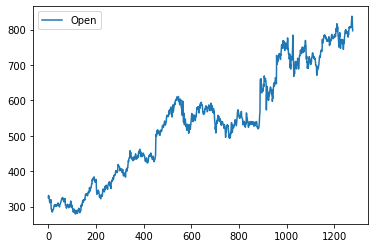

In [8]:
df.plot()

In [9]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1/3/2012,325.25
1,1/4/2012,331.27
2,1/5/2012,329.83
3,1/6/2012,328.34
4,1/9/2012,322.04


In [13]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [10]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [6]:
# Initialize the Model
model=Prophet()

In [11]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [15]:
prediction=model.predict(future_dates)

In [16]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-03,296.494595,278.748501,330.029625,296.494595,296.494595,7.344824,7.344824,7.344824,-5.590613,-5.590613,-5.590613,12.935437,12.935437,12.935437,0.0,0.0,0.0,303.839419
1,2012-01-04,296.658898,281.193446,331.026188,296.658898,296.658898,7.421216,7.421216,7.421216,-5.220264,-5.220264,-5.220264,12.641479,12.641479,12.641479,0.0,0.0,0.0,304.080114
2,2012-01-05,296.823202,278.444020,331.333929,296.823202,296.823202,7.452622,7.452622,7.452622,-4.897519,-4.897519,-4.897519,12.350141,12.350141,12.350141,0.0,0.0,0.0,304.275824
3,2012-01-06,296.987506,279.884383,330.109291,296.987506,296.987506,7.205553,7.205553,7.205553,-4.856641,-4.856641,-4.856641,12.062194,12.062194,12.062194,0.0,0.0,0.0,304.193059
4,2012-01-09,297.480417,280.104911,327.886116,297.480417,297.480417,4.871103,4.871103,4.871103,-6.349926,-6.349926,-6.349926,11.221029,11.221029,11.221029,0.0,0.0,0.0,302.351519


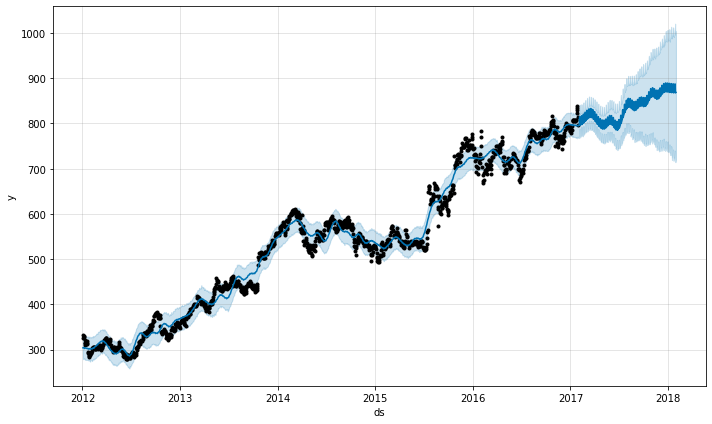

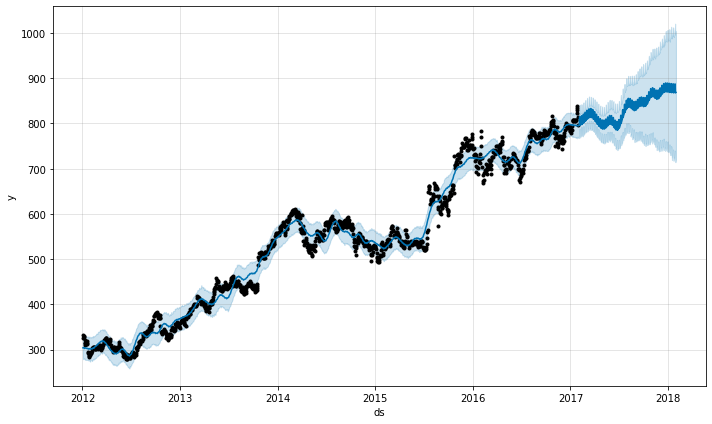

In [17]:
### plot the predicted projection
model.plot(prediction)

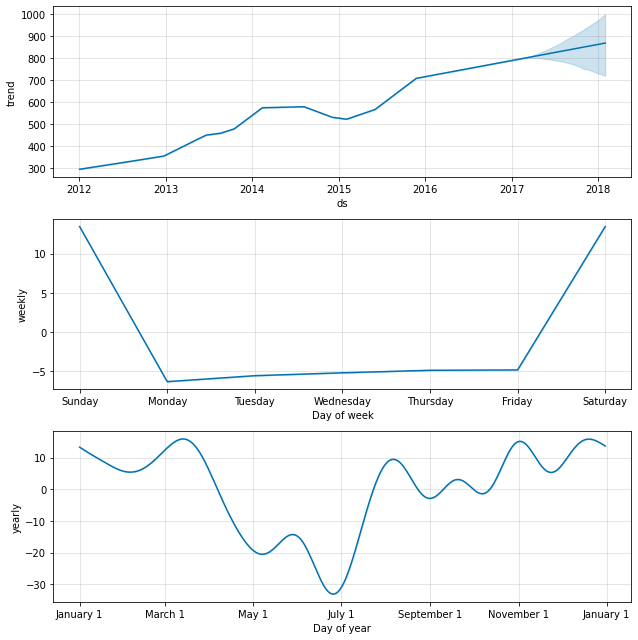

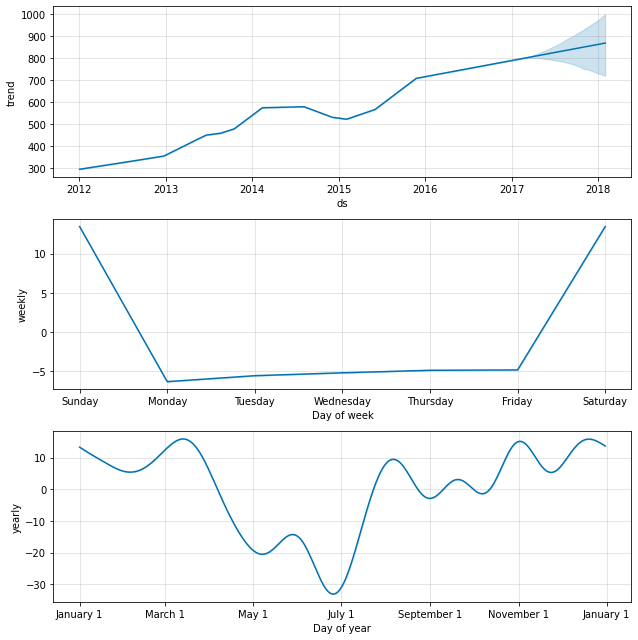

In [18]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

In [19]:
df.head()

,ds,y
0,1/3/2012,325.25
1,1/4/2012,331.27
2,1/5/2012,329.83
3,1/6/2012,328.34
4,1/9/2012,322.04


In [20]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-02-11 00:00:00 and 2016-02-01 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-02-12,595.729036,582.625656,608.675145,592.28,2014-02-11
1,2014-02-13,598.630189,584.611031,612.649450,588.17,2014-02-11
2,2014-02-14,600.488077,587.469088,613.208367,595.57,2014-02-11
3,2014-02-18,607.197186,593.015035,620.119928,598.46,2014-02-11
4,2014-02-19,608.996769,596.712161,622.261682,600.40,2014-02-11


In [21]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,2042.614340,45.195291,34.756219,0.053929,0.038134,0.372000
1,38 days,2102.720669,45.855432,35.404802,0.054961,0.039149,0.364000
2,39 days,2147.277451,46.338725,35.947086,0.055763,0.039784,0.352000
3,40 days,2146.141361,46.326465,36.053381,0.056003,0.040533,0.346667
4,41 days,2158.444553,46.459063,36.356085,0.056595,0.041164,0.330667


In [22]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,2042.614340,45.195291,34.756219,0.053929,0.038134,0.372000
1,38 days,2102.720669,45.855432,35.404802,0.054961,0.039149,0.364000
2,39 days,2147.277451,46.338725,35.947086,0.055763,0.039784,0.352000
3,40 days,2146.141361,46.326465,36.053381,0.056003,0.040533,0.346667
4,41 days,2158.444553,46.459063,36.356085,0.056595,0.041164,0.330667


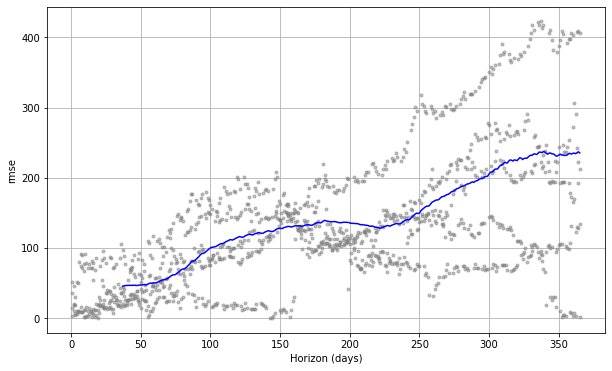

In [23]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')